### 1. Notebook Introduction

**Based on "Image Thresholding using Tsallis entropy",
Paper by M. Portes de Albuquerque , I.A. Esquef, A.R. Gesualdi Mello.**



The Tsallis
statistics is currently considered useful in describing the thermostatistical properties of nonextensive systems, and it is based on a generalized entropic form:

$$ S_q = \frac{1 -\sum_{i=1}^{k}{(Pi)^q}}{q - 1} $$

For an image with k gray-levels, let $Pi = p1, p2,...pk.$ be the probability distribution of the
levels.

From this distribution we derive two
probability distributions, one for the object (class
A) and another for the background (class B). The
probability distributions of the object and background classes, A and B, are given by:

$$ P^A = \frac{P1}{P^A}, \frac{P2}{P^A},...,\frac{Pt}{P^A}. $$

$$ P^B = \frac{Pt+1}{P^B}, \frac{Pt+2}{P^B},...,\frac{Pk}{P^B}. $$

Where:

$ P^A = \sum_{i=1}^{t}{Pi} $ 
and
$P^B = \sum_{i=t+1}^{k}{Pi}$

The a priori Tsallis entropy for each distribution is defined a

$$ S^A_q(t) =\frac{1 -\sum_{i=1}^{t}\left(\frac{Pi}{p^A}\right)^q}{q - 1} $$

$$ S^B_q(t) =\frac{1 -\sum_{i=t+1}^{k}\left(\frac{Pi}{p^B}\right)^q}{q - 1} $$

The Tsallis entropy $S_q(t)$ is parametrically dependent upon the threshold value t for the foreground
and background. It is formulated as the sum of
each entropy, allowing the pseudo-additive property for statistically independent systems:

$$ S_q(t) = S^A_q(t) + S^B_q(t) + (1 - q) \times S^A_q(t) \times S^B_q(t) $$

We maximize the information measure between
the two classes (object and background). When
$S_q(t)$ is maximized, the luminance level t is considered to be the optimum threshold value. This
can be achieved with a cheap computational effort

$$ t_opt = argmax[S^A_q(t) + S^B_q(t) + (1 - q) \times S^A_q(t) \times S^B_q(t)] $$

In [1]:
### Import 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

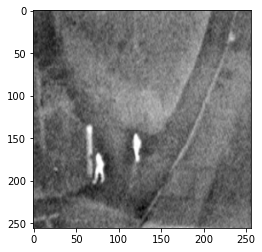

In [3]:

img = cv2.imread('000280.jpg')
img_2 = cv2.imread('cell1.png')
img_3 = cv2.imread('image3.png')
img_4= cv2.imread('pcb1.png')
img_5 = cv2.imread('image13.png')

#converting to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2GRAY)
img_5 = cv2.cvtColor(img_5, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.imshow(img_2, cmap='gray')
plt.imshow(img_3, cmap='gray')
plt.imshow(img_4, cmap='gray')
plt.imshow(img_5, cmap='gray')

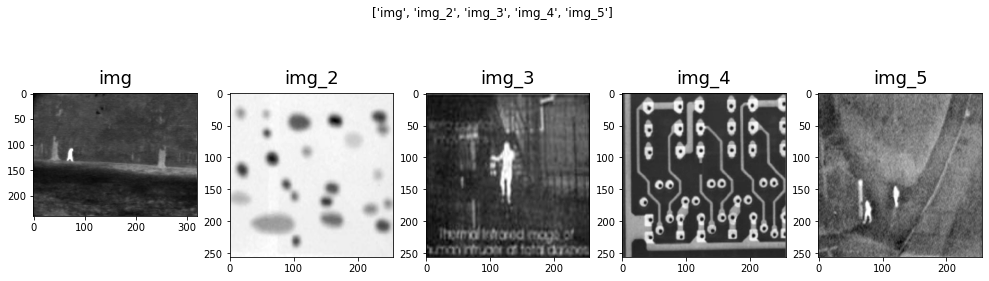

In [4]:
imgsArray = [img, img_2, img_3, img_4, img_5]
titlesArray = ['img', 'img_2', 'img_3', 'img_4', 'img_5']
showMultipleImages(imgsArray, titlesArray, (17, 12), 5, 1)

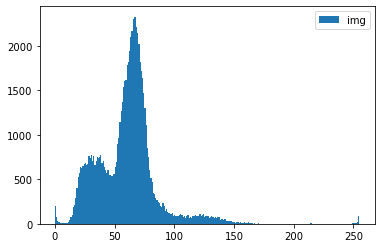

In [30]:
plt.figure()
plt.hist(img.flatten(), bins=np.arange(256))
plt.legend(["img"])
plt.show()

In [31]:
# function to print grayscale image 

def imshow(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

## Tsallis' Entropy

### Img Verification

The threshold value is:  91
entropic index q is:  0.6


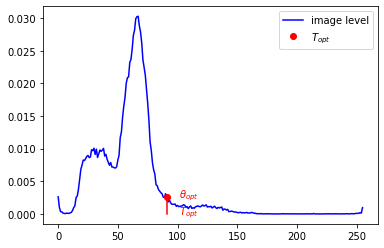

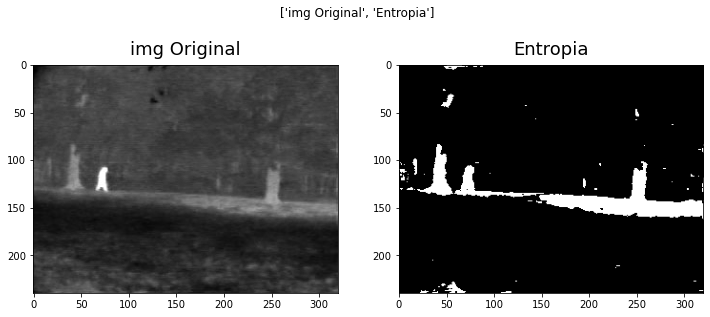

In [32]:
 
    
# Maximum entropy
H = cv2.calcHist([img],[0],None,[256],[0,256])
H = H / np.sum(H)

# H é uma matriz 256x1, cada valor corresponde ao número de pixels da imagem
# com seus valores correspondentes

# np.zeros is used to create a new array of given shapes and 
# types filled with zero values

q = 0.6 # parametro q de tsallis

Pb = np.zeros(256)
Pf = np.zeros(256)
Sb = np.zeros(256)
Sf = np.zeros(256)

for i in range(1, 256):
    Pb[i] = Pb[i-1] + H[i]
    Pf[i] = 1 - Pb[i]
    
def entropia(q, ParteBg):
    inicial = 0
    final = 0
    somatorio = 0
    
    for i in range(0, 256):
        somatorio = 0
        if ParteBg != 0:
            inicial = 0
            final = i + 1
        else:
            inicial = i + 1
            final = 256
         
        for j in range(inicial, final):
            if ParteBg != 0:
                if abs(Pb[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pb[i])**q
            else:
                if abs(Pf[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pf[i])**q
            
        if ParteBg != 0:
            Sb[i] = (1/(1-q)) * (1 - somatorio) 
        else:
            Sf[i] = (1/(1-q)) * (1 - somatorio) 
            
            
entropia(q, 0)
entropia(q, 1)

argmax = 0

entropiaMaxima = Sb[0] + Sf[0] + (1 - q) * Sb[0] * Sf[0]
for i in range(0, 256):
    if(entropiaMaxima < Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]):
        argmax = i
        entropiaMaxima = Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]
        
#print(argmax)   

img_out = img > argmax


# Show histogram
plt.plot([i for i in range(256)], H, 'b')
plt.plot([argmax], [H[argmax]], 'ro')
plt.plot([argmax, argmax], [0, H[argmax]], 'r')

plt.legend(["image level" ,"$T_{opt}$"])

plt.annotate("$\\theta_{opt}$", 
            xy=(argmax, H[argmax]), 
            xytext=(10+argmax, H[argmax]),
            color='r')

plt.annotate("$T_{opt}$", 
            xy=(argmax, 0), 
            xytext=(10+argmax, 0),
            color='r')

# Show image
print("The threshold value is: ", argmax)
print("entropic index q is: ", q)
img_out = img_out * 255


imgsArray = [img, img_out ]
titlesArray = ['img Original', 'Entropia']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)

### img_2 Verification

The threshold value is:  170
entropic index q is:  0.6


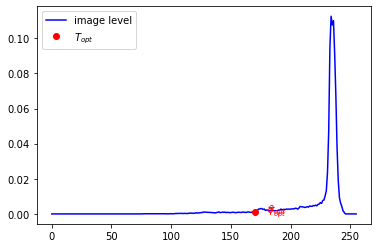

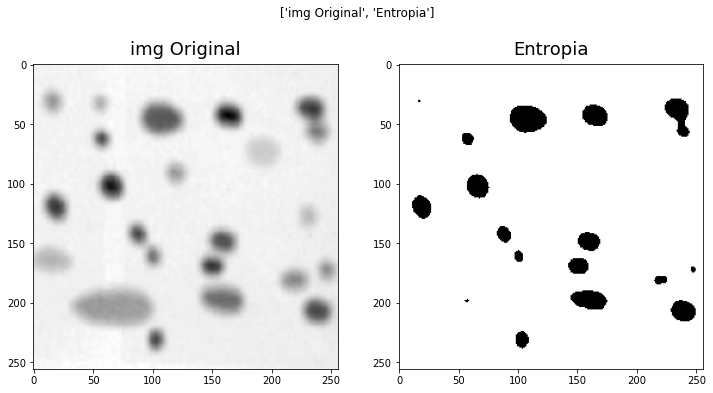

In [33]:
# Maximum entropy
H = cv2.calcHist([img_2],[0],None,[256],[0,256])
H = H / np.sum(H)

# H é uma matriz 256x1, cada valor corresponde ao número de pixels da imagem
# com seus valores correspondentes

# np.zeros is used to create a new array of given shapes and 
# types filled with zero values

q = 0.6 # parametro q de tsallis

Pb = np.zeros(256)
Pf = np.zeros(256)
Sb = np.zeros(256)
Sf = np.zeros(256)

for i in range(1, 256):
    Pb[i] = Pb[i-1] + H[i]
    Pf[i] = 1 - Pb[i]
    
def entropia(q, ParteBg):
    inicial = 0
    final = 0
    somatorio = 0
    
    for i in range(0, 256):
        somatorio = 0
        if ParteBg != 0:
            inicial = 0
            final = i + 1
        else:
            inicial = i + 1
            final = 256
         
        for j in range(inicial, final):
            if ParteBg != 0:
                if abs(Pb[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pb[i])**q
            else:
                if abs(Pf[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pf[i])**q
            
        if ParteBg != 0:
            Sb[i] = (1/(1-q)) * (1 - somatorio) 
        else:
            Sf[i] = (1/(1-q)) * (1 - somatorio) 
            
            
entropia(q, 0)
entropia(q, 1)

argmax = 0

entropiaMaxima = Sb[0] + Sf[0] + (1 - q) * Sb[0] * Sf[0]
for i in range(0, 256):
    if(entropiaMaxima < Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]):
        argmax = i
        entropiaMaxima = Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]
        
#print(argmax)

img_out_2 = img_2 > argmax

# Show histogram
plt.plot([i for i in range(256)], H, 'b')
plt.plot([argmax], [H[argmax]], 'ro')
plt.plot([argmax, argmax], [0, H[argmax]], 'r')

plt.legend(["image level" ,"$T_{opt}$"])

plt.annotate("$\\theta_{opt}$", 
            xy=(argmax, H[argmax]), 
            xytext=(10+argmax, H[argmax]),
            color='r')

plt.annotate("$T_{opt}$", 
            xy=(argmax, 0), 
            xytext=(10+argmax, 0),
            color='r')


# Show image
print("The threshold value is: ", argmax)
print("entropic index q is: ", q)
img_out_2 = img_out_2 * 255


imgsArray = [img_2, img_out_2 ]
titlesArray = ['img Original', 'Entropia']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)
            

### img_3 verification

The threshold value is:  165
entropic index q is:  0.6


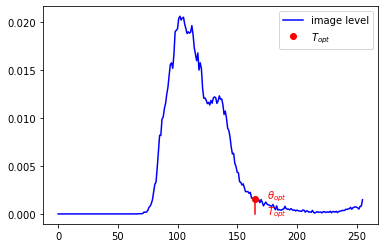

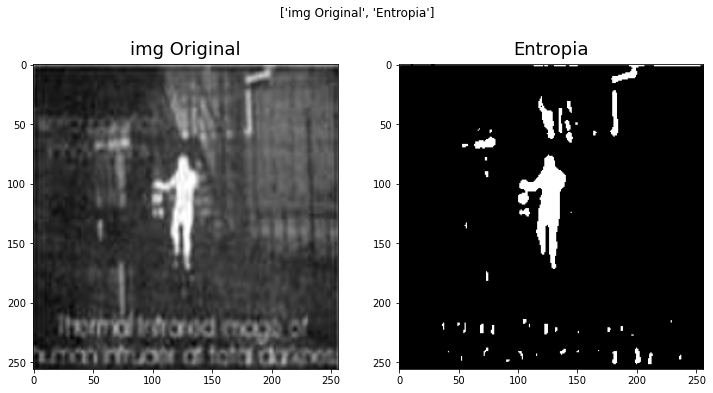

In [34]:
# Maximum entropy
H = cv2.calcHist([img_3],[0],None,[256],[0,256])
H = H / np.sum(H)

# H é uma matriz 256x1, cada valor corresponde ao número de pixels da imagem
# com seus valores correspondentes

# np.zeros is used to create a new array of given shapes and 
# types filled with zero values

q = 0.6 # parametro q de tsallis

Pb = np.zeros(256)
Pf = np.zeros(256)
Sb = np.zeros(256)
Sf = np.zeros(256)

for i in range(1, 256):
    Pb[i] = Pb[i-1] + H[i]
    Pf[i] = 1 - Pb[i]
    
def entropia(q, ParteBg):
    inicial = 0
    final = 0
    somatorio = 0
    
    for i in range(0, 256):
        somatorio = 0
        if ParteBg != 0:
            inicial = 0
            final = i + 1
        else:
            inicial = i + 1
            final = 256
         
        for j in range(inicial, final):
            if ParteBg != 0:
                if abs(Pb[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pb[i])**q
            else:
                if abs(Pf[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pf[i])**q
            
        if ParteBg != 0:
            Sb[i] = (1/(1-q)) * (1 - somatorio) 
        else:
            Sf[i] = (1/(1-q)) * (1 - somatorio) 
            
            
entropia(q, 0)
entropia(q, 1)

argmax = 0

entropiaMaxima = Sb[0] + Sf[0] + (1 - q) * Sb[0] * Sf[0]
for i in range(0, 256):
    if(entropiaMaxima < Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]):
        argmax = i
        entropiaMaxima = Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]
        
#print(argmax)

img_out_3 = img_3 > argmax

# Show histogram
plt.plot([i for i in range(256)], H, 'b')
plt.plot([argmax], [H[argmax]], 'ro')
plt.plot([argmax, argmax], [0, H[argmax]], 'r')

plt.legend(["image level" ,"$T_{opt}$"])

plt.annotate("$\\theta_{opt}$", 
            xy=(argmax, H[argmax]), 
            xytext=(10+argmax, H[argmax]),
            color='r')

plt.annotate("$T_{opt}$", 
            xy=(argmax, 0), 
            xytext=(10+argmax, 0),
            color='r')


# Show image
print("The threshold value is: ", argmax)
print("entropic index q is: ", q)
img_out_3 = img_out_3 * 255


imgsArray = [img_3, img_out_3]
titlesArray = ['img Original', 'Entropia']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)
            

### img_4 Verification

The threshold value is:  157
entropic index q is:  0.6


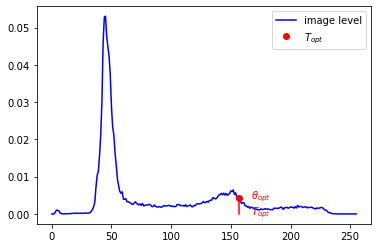

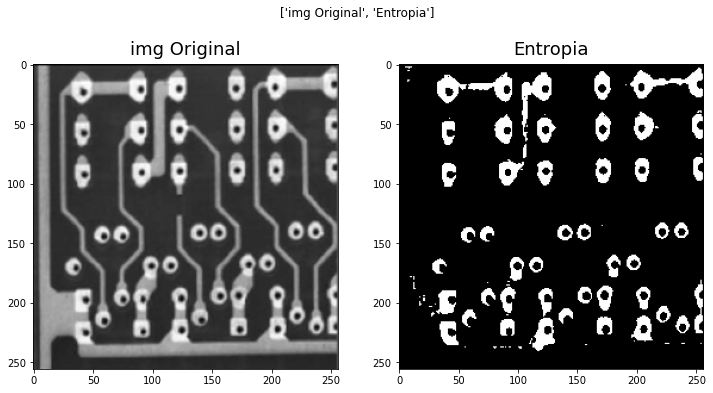

In [35]:
# Maximum entropy
H = cv2.calcHist([img_4],[0],None,[256],[0,256])
H = H / np.sum(H)

# H é uma matriz 256x1, cada valor corresponde ao número de pixels da imagem
# com seus valores correspondentes

# np.zeros is used to create a new array of given shapes and 
# types filled with zero values

q = 0.6 # parametro q de tsallis

Pb = np.zeros(256)
Pf = np.zeros(256)
Sb = np.zeros(256)
Sf = np.zeros(256)

for i in range(1, 256):
    Pb[i] = Pb[i-1] + H[i]
    Pf[i] = 1 - Pb[i]
    
def entropia(q, ParteBg):
    inicial = 0
    final = 0
    somatorio = 0
    
    for i in range(0, 256):
        somatorio = 0
        if ParteBg != 0:
            inicial = 0
            final = i + 1
        else:
            inicial = i + 1
            final = 256
         
        for j in range(inicial, final):
            if ParteBg != 0:
                if abs(Pb[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pb[i])**q
            else:
                if abs(Pf[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pf[i])**q
            
        if ParteBg != 0:
            Sb[i] = (1/(1-q)) * (1 - somatorio) 
        else:
            Sf[i] = (1/(1-q)) * (1 - somatorio) 
            
            
entropia(q, 0)
entropia(q, 1)

argmax = 0

entropiaMaxima = Sb[0] + Sf[0] + (1 - q) * Sb[0] * Sf[0]
for i in range(0, 256):
    if(entropiaMaxima < Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]):
        argmax = i
        entropiaMaxima = Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]
        
#print(argmax)

img_out_4 = img_4 > argmax

# Show histogram
plt.plot([i for i in range(256)], H, 'b')
plt.plot([argmax], [H[argmax]], 'ro')
plt.plot([argmax, argmax], [0, H[argmax]], 'r')

plt.legend(["image level" ,"$T_{opt}$"])

plt.annotate("$\\theta_{opt}$", 
            xy=(argmax, H[argmax]), 
            xytext=(10+argmax, H[argmax]),
            color='r')

plt.annotate("$T_{opt}$", 
            xy=(argmax, 0), 
            xytext=(10+argmax, 0),
            color='r')


# Show image
print("The threshold value is: ", argmax)
print("entropic index q is: ", q)
img_out_4 = img_out_4 * 255


imgsArray = [img_4, img_out_4]
titlesArray = ['img Original', 'Entropia']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)
            

### img_5 verification

The threshold value is:  204
entropic index q is:  0.6


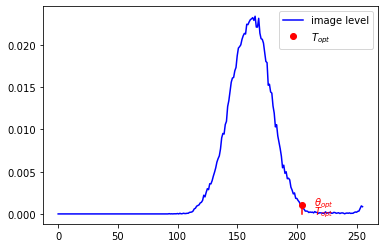

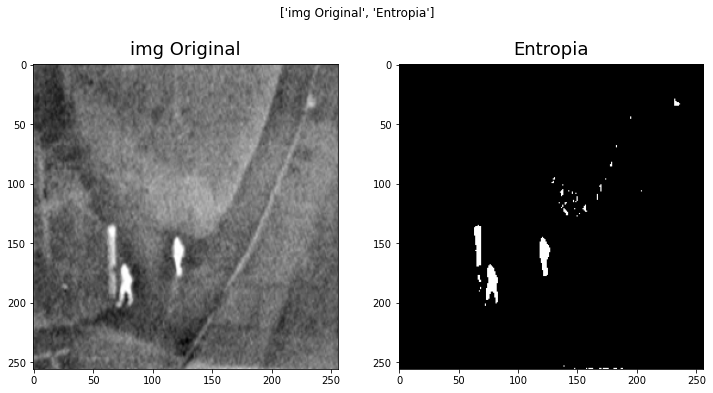

In [36]:
# Maximum entropy
H = cv2.calcHist([img_5],[0],None,[256],[0,256])
H = H / np.sum(H)

# H é uma matriz 256x1, cada valor corresponde ao número de pixels da imagem
# com seus valores correspondentes

# np.zeros is used to create a new array of given shapes and 
# types filled with zero values

q = 0.6 # parametro q de tsallis

Pb = np.zeros(256)
Pf = np.zeros(256)
Sb = np.zeros(256)
Sf = np.zeros(256)

for i in range(1, 256):
    Pb[i] = Pb[i-1] + H[i]
    Pf[i] = 1 - Pb[i]
    
def entropia(q, ParteBg):
    inicial = 0
    final = 0
    somatorio = 0
    
    for i in range(0, 256):
        somatorio = 0
        if ParteBg != 0:
            inicial = 0
            final = i + 1
        else:
            inicial = i + 1
            final = 256
         
        for j in range(inicial, final):
            if ParteBg != 0:
                if abs(Pb[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pb[i])**q
            else:
                if abs(Pf[i]) < 1e-5:
                    continue
                somatorio += (H[j] / Pf[i])**q
            
        if ParteBg != 0:
            Sb[i] = (1/(1-q)) * (1 - somatorio) 
        else:
            Sf[i] = (1/(1-q)) * (1 - somatorio) 
            
            
entropia(q, 0)
entropia(q, 1)

argmax = 0

entropiaMaxima = Sb[0] + Sf[0] + (1 - q) * Sb[0] * Sf[0]
for i in range(0, 256):
    if(entropiaMaxima < Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]):
        argmax = i
        entropiaMaxima = Sb[i] + Sf[i] + (1 - q) * Sb[i] * Sf[i]
        
#print(argmax)

img_out_5 = img_5 > argmax

# Show histogram
plt.plot([i for i in range(256)], H, 'b')
plt.plot([argmax], [H[argmax]], 'ro')
plt.plot([argmax, argmax], [0, H[argmax]], 'r')

plt.legend(["image level" ,"$T_{opt}$"])

plt.annotate("$\\theta_{opt}$", 
            xy=(argmax, H[argmax]), 
            xytext=(10+argmax, H[argmax]),
            color='r')

plt.annotate("$T_{opt}$", 
            xy=(argmax, 0), 
            xytext=(10+argmax, 0),
            color='r')


# Show image
print("The threshold value is: ", argmax)
print("entropic index q is: ", q)
img_out_5 = img_out_5 * 255


imgsArray = [img_5, img_out_5]
titlesArray = ['img Original', 'Entropia']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)
            